In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
!kaggle datasets download -d yasserh/walmart-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/walmart-dataset
License(s): CC0-1.0
  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 59.2MB/s]


In [ ]:
!unzip walmart-dataset.zip

Archive:  walmart-dataset.zip
  inflating: Walmart.csv             


In [ ]:
df = pd.read_csv('Walmart.csv')

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe(include='number')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.describe(include='object')

,Date
count,6435
unique,143
top,05-02-2010
freq,45


#Data Cleaning


#Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [ ]:
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#Removing duplicates


In [ ]:
df.duplicated().sum()

0

In [ ]:
def get_season(quarter):

    '''this function is to get season according to quarter column'''

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
# correct data format of the 'date' column
df['Date'] = pd.to_datetime(df['Date'], format = "%d-%m-%Y")

# Create a new column "year" containing the year
df['year'] = df['Date'].dt.year

# Create a new column "quarter" containing the season number
df['quarter'] = df['Date'].dt.quarter

# Create a new column "season" containing the season
df['season'] = df['quarter'].apply(get_season)

# Create a new column "month" containing the month number
df['month'] = df['Date'].dt.month

# Create a new column "month_name" containing the month names
df['month_name'] = df['Date'].dt.month_name()

# Create a new column "week" containing the week number
df['week'] = df['Date'].dt.isocalendar().week

# Create a new column "day_of_week" containing the day names
df['day_of_week'] = df['Date'].dt.day_name()

In [ ]:
df.shape

(6435, 15)

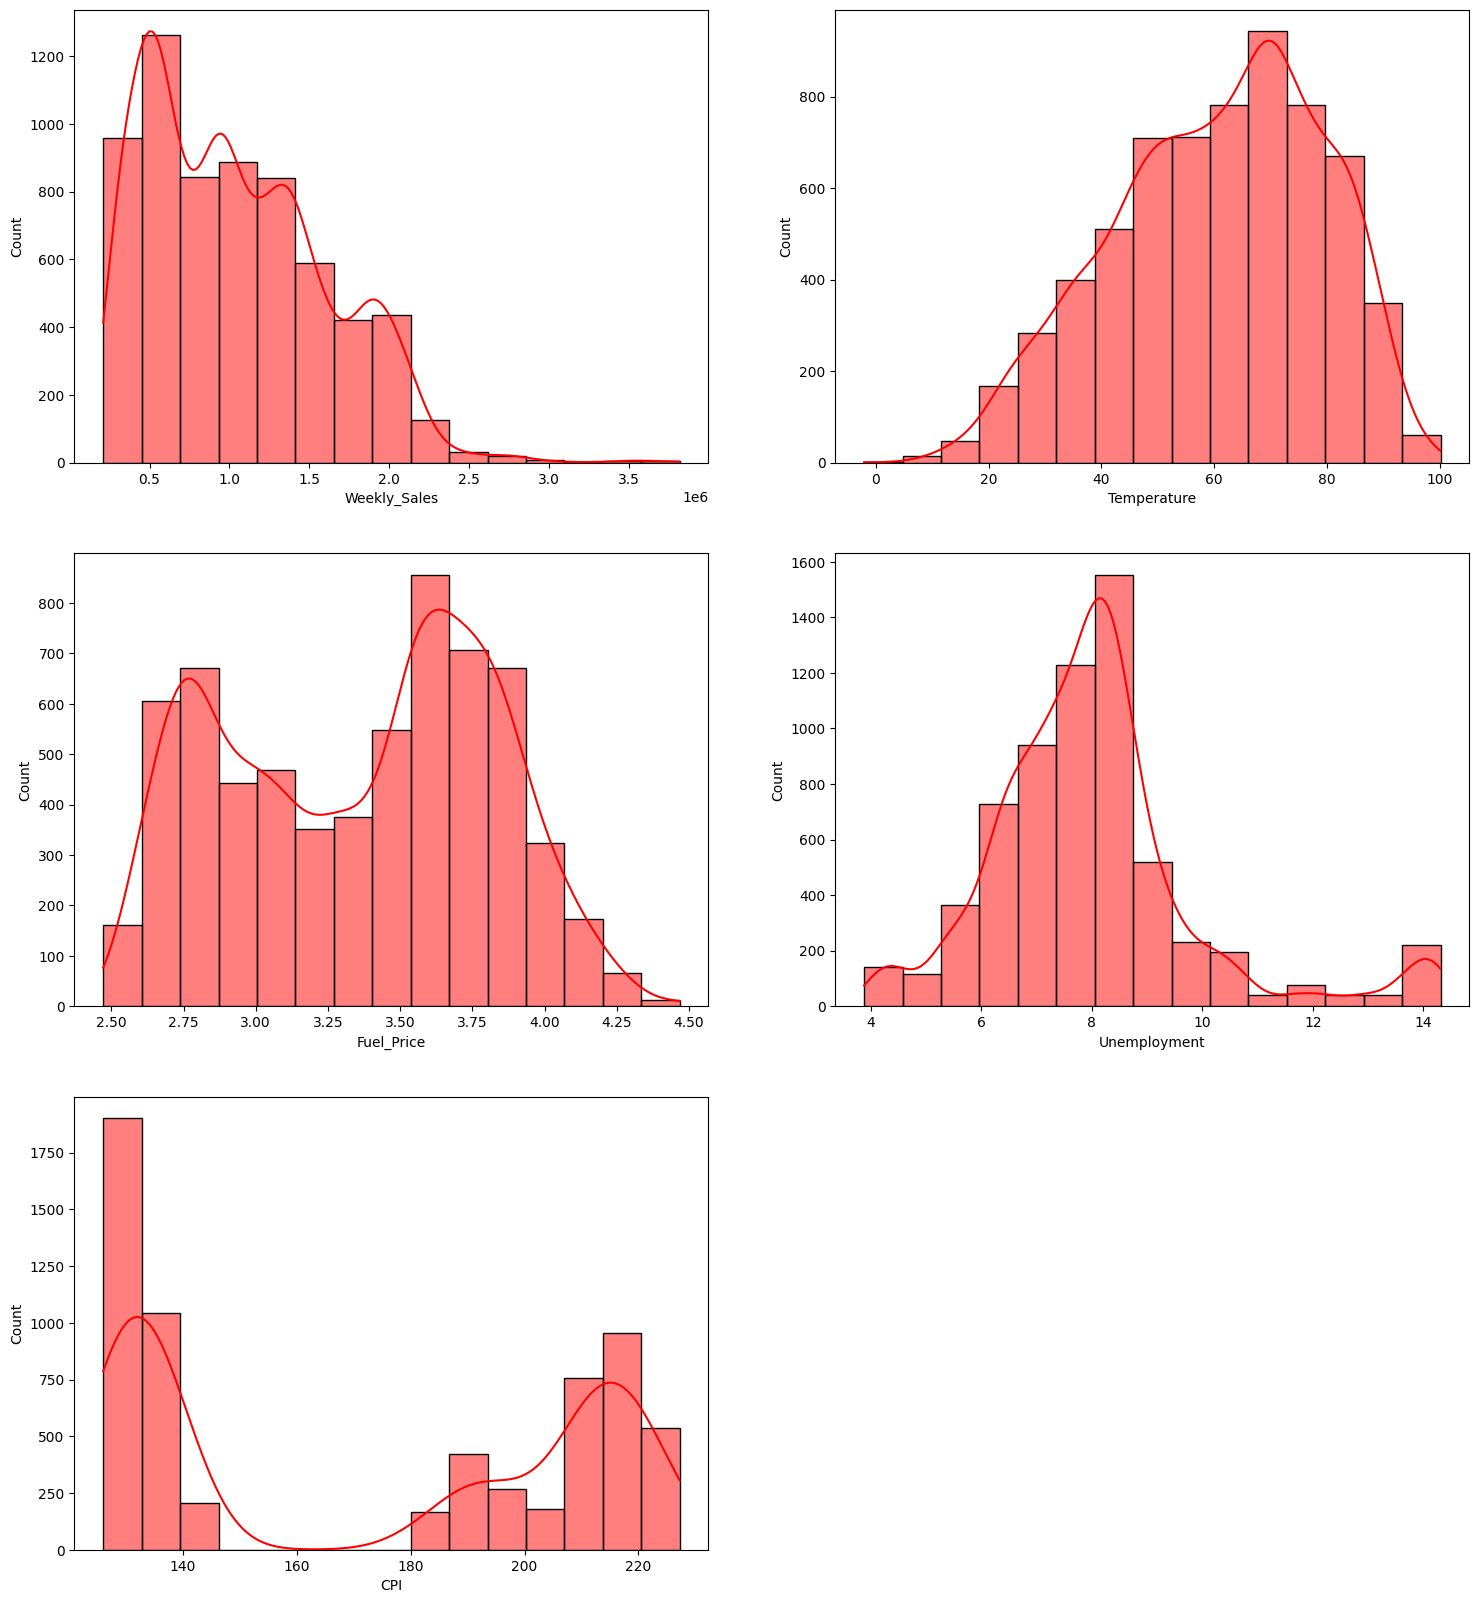

In [ ]:
columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment', 'CPI']
plt.figure(figsize=(18, 20))
for i,col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = 15, color = 'r')
plt.show()

#Conclusion:

The distribution of Weekly_Sales is right skewed, this is normal because the weekly sales may be high in some time.
Temperature and Unemployment have normal distribution.
CPI and Fuel_Price have bimodal distribution.

In [ ]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [ ]:
df['year'].value_counts()

year
2011    2340
2010    2160
2012    1935
Name: count, dtype: int64

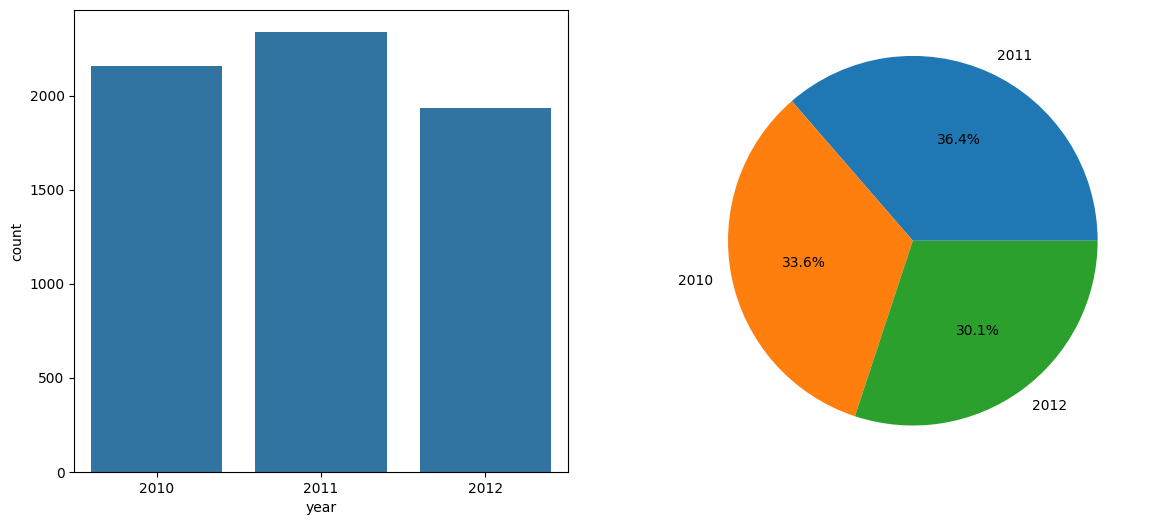

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = df, x = 'year', ax = ax[0])
ax[1].pie(df['year'].value_counts().values,
          labels = df['year'].value_counts().index,
          autopct = '%1.1f%%')
plt.show()

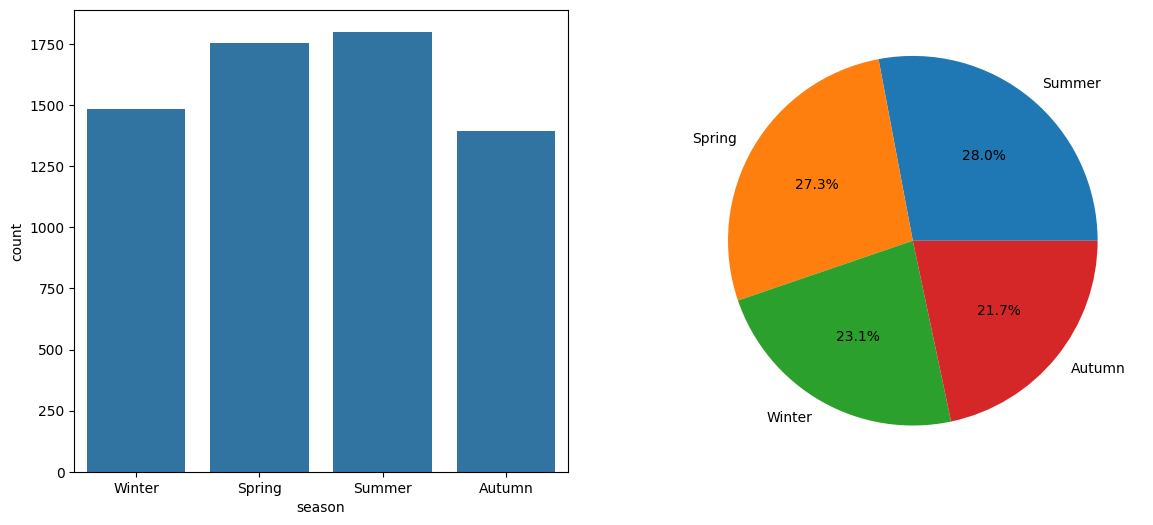

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = df, x = 'season', ax = ax[0])
ax[1].pie(df['season'].value_counts().values,
          labels = df['season'].value_counts().index,
          autopct = '%1.1f%%')
plt.show()

<ipython-input-27-6ca40fcc0140>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df,


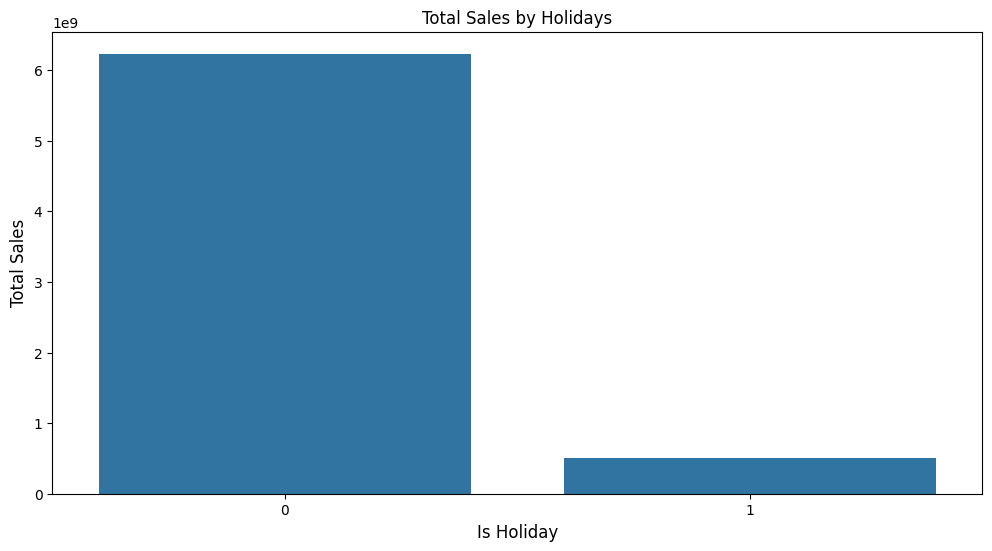

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(data = df,
            x = 'Holiday_Flag',
            y = 'Weekly_Sales',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Total Sales', size = 12)
plt.show()

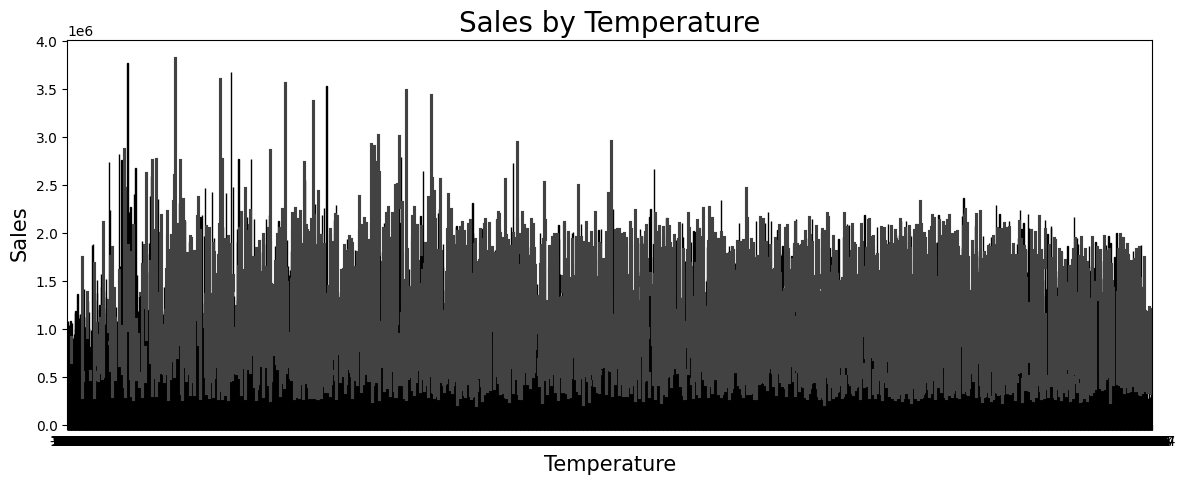

In [ ]:
plt.figure(figsize = (14, 5))
sns.barplot(data = df,
                x = 'Temperature',
                y = 'Weekly_Sales',
                edgecolor = "black")

# Add labels and title
plt.title('Sales by Temperature', size = 20)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()